In [9]:
import re, string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')

text = input("Enter paragraph: ")

# Tokenize using regex (no punkt needed)
t = re.findall(r'\b\w+\b', text.lower())

stem = PorterStemmer()
lem = WordNetLemmatizer()

print("Tokens:", t)
print("Stems:", [stem.stem(w) for w in t])
print("Lemmas:", [lem.lemmatize(w) for w in t])

[nltk_data] Downloading package wordnet to /root/nltk_data...


Enter paragraph: hehe! wanted. to watch the changes that are possible within reach
Tokens: ['hehe', 'wanted', 'to', 'watch', 'the', 'changes', 'that', 'are', 'possible', 'within', 'reach']
Stems: ['hehe', 'want', 'to', 'watch', 'the', 'chang', 'that', 'are', 'possibl', 'within', 'reach']
Lemmas: ['hehe', 'wanted', 'to', 'watch', 'the', 'change', 'that', 'are', 'possible', 'within', 'reach']


In [11]:
import re

text = input("Enter text: ")

digits = re.findall(r'\d+', text)
phone = re.findall(r'\b\d{10}\b', text)
emails = re.findall(r'\b[\w\.]+@[\w\.]+\.\w+', text)

print("Digits:", digits)
print("Phone numbers:", phone)
print("Emails:", emails)

#hi, my name is hehe! 3 4 5 6, my number is 4567382743, and email would be hehecatto.thegreat@gmail.ac.in

Enter text: hi, my name is hehe! 3 4 5 6, my number is 4567382743, and email would be hehecatto.thegreat@gmail.ac.in
Digits: ['3', '4', '5', '6', '4567382743']
Phone numbers: ['4567382743']
Emails: ['hehecatto.thegreat@gmail.ac.in']


In [21]:
import re

text = input("Enter text: ")

pattern = r"[A-Za-z]+(?:'[A-Za-z]+)?|[A-Z]{2,}|[A-Za-z]+-[A-Za-z]+|[^\w\s]"
token = re.findall(pattern, text)
print(token)

# USA isn't bad—it's ice-cream, dude!

Enter text: USA isn't bad—it's ice-cream, dude!
['USA', "isn't", 'bad', '—', "it's", 'ice', '-', 'cream', ',', 'dude', '!']


In [58]:
#naive bayes sentiment analysis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

texts = ["I love this movie", "This is amazing", "I feel great",
         "I hate this place", "This is terrible", "I feel awful"]
labels = ["pos", "pos", "pos", "neg", "neg", "neg"]

vec = CountVectorizer()
x = vec.fit_transform(texts)

classifier = MultinomialNB()
classifier.fit(x, labels)

text = input("Enter text: ")
test = vec.transform([text])
print(classifier.predict(test))

Enter text: made me want to break the screen
['neg']


In [64]:
#noisy channel model

V = ['kite', 'know', 'kill', 'now', 'knee', 'night', 'knight']
true_word = 'night'
s = 'nihgt'

def edit_distance(a, b):
    m, n = len(a), len(b)
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(m+1): dp[i][0] = i
    for j in range(n+1): dp[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            cost = 0 if a[i-1] == b[j-1] else 1
            dp[i][j] = min(
                dp[i-1][j] + 1,
                dp[i][j-1] + 1,
                dp[i-1][j-1] + cost
            )
            if i > 1 and j > 1 and a[i-1] == b[j-2] and a[i-2] == b[j-1]:
                dp[i][j] = min(dp[i][j], dp[i-2][j-2] + 1)
    return dp[m][n]

P_w = {w: 1/len(V) for w in V}

def P_s_given_w(w, s):
    return (0.001) ** edit_distance(w, s)

def score(w):
    return P_s_given_w(w, s) * P_w[w]

scores = {w: score(w) for w in V}
best = max(scores, key=scores.get)

print("Misspelled word:", s)
print("Edit distances:", {w: edit_distance(w, s) for w in V})
print("Scores:", scores)
print("Best correction:", best)
print("True word:", true_word)


Misspelled word: nihgt
Edit distances: {'kite': 4, 'know': 5, 'kill': 4, 'now': 4, 'knee': 5, 'night': 1, 'knight': 2}
Scores: {'kite': 1.4285714285714287e-13, 'know': 1.4285714285714286e-16, 'kill': 1.4285714285714287e-13, 'now': 1.4285714285714287e-13, 'knee': 1.4285714285714286e-16, 'night': 0.00014285714285714284, 'knight': 1.4285714285714285e-07}
Best correction: night
True word: night


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 25.2 MB/s eta 0:00:00


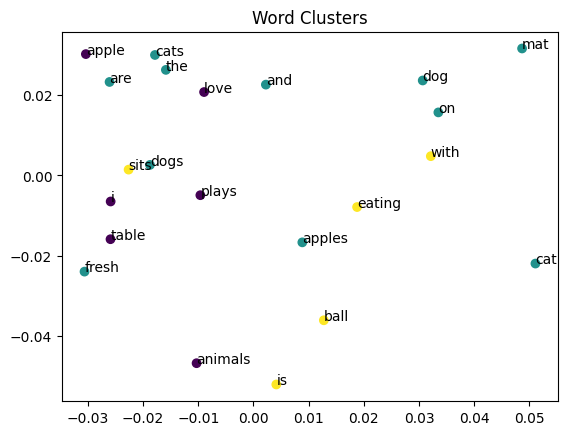

In [66]:
#word2Vec clustering + PCA plot

!pip install gensim

from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

corpus = [
    "the cat sits on the mat",
    "the dog plays with the ball",
    "cats and dogs are animals",
    "the apple is on the table",
    "i love eating fresh apples"
]
sentences = [s.split() for s in corpus]

model = Word2Vec(sentences, vector_size=50, min_count=1)

words = list(model.wv.index_to_key)
X = model.wv[words]

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:,0], coords[:,1], c=labels)
for i, w in enumerate(words):
    plt.annotate(w, (coords[i,0], coords[i,1]))

plt.title("Word Clusters")
plt.show()


In [71]:
#FSA that accepts valid English plural nouns ending with 'y'

vowels = "aeiou"

def accepts(word):
    # Case 1: vowel + y + s (e.g., boys, toys)
    if len(word) >= 3 and word[-1] == 's' and word[-2] == 'y':
        return word[-3] in vowels

    # Case 2: consonant + ies (e.g., ponies, skies, puppies)
    if len(word) >= 4 and word.endswith("ies"):
        return word[-4] not in vowels

    return False

# Testing
words = ["boys", "toys", "ponies", "skies", "puppies", "bodys", "bodies",
         "boies", "toies", "ponys", "skys", "toies"]

for w in words:
    print(w, "→", accepts(w))


boys → True
toys → True
ponies → True
skies → True
puppies → True
bodys → False
bodies → True
boies → False
toies → False
ponys → False
skys → False
toies → False
